In [1]:
import sys
# Python 3.8 is required
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np
# from utils import display_images

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

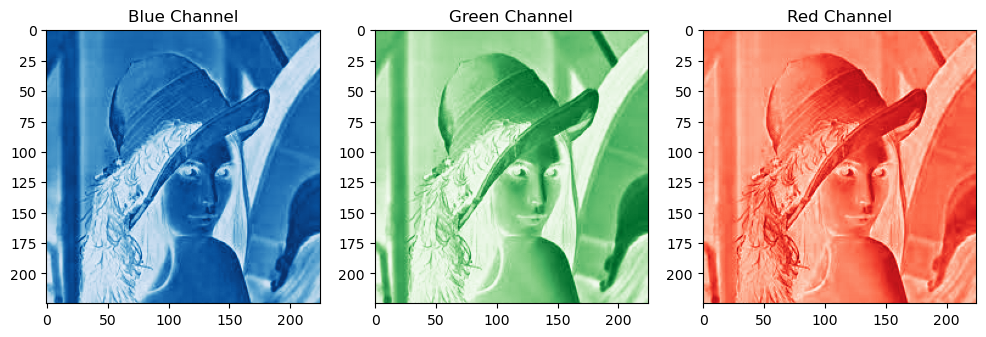

In [2]:
#Exercise - Question 1
import matplotlib.pyplot as plt

# Load the Lena image
img_lena = cv.imread('images/images/lena.png')
img_lena_rgb = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)

# Split into channels
b, g, r = cv.split(img_lena_rgb)

# Create a figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Display blue channel
ax1.imshow(b, cmap='Blues')
ax1.set_title('Blue Channel')


# Display green channel
ax2.imshow(g, cmap='Greens')
ax2.set_title('Green Channel')


# Display red channel
ax3.imshow(r, cmap='Reds')
ax3.set_title('Red Channel')


plt.show()

In [3]:
#Exercise - Question 2
img_blue = cv.imread('images/images/dog.jfif')
img_blue[:,:,0]=255

img_green = cv.imread('images/images/dog.jfif')
img_green[:,:,1]=255

img_red = cv.imread('images/images/dog.jfif')
img_red[:,:,2]=255


cv.imshow("blue",img_blue)
cv.imshow("green",img_green)
cv.imshow("red",img_red)

cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
#Exercise - Q1
from skimage.util import random_noise

#display grayscale image
img_dog_gray=cv.imread('images/images/dog.png',0)

#display image with noise 
img_dog=cv.imread('images/images/dog.png')
noise_img = random_noise(img_dog,mode='s&p',amount=0.3) #add salt and pepper
noise_img = np.array(255*noise_img, dtype = 'uint8')

cv.imshow("IMG_GRAY",img_dog_gray)
cv.imshow("IMG_NOISE",noise_img)
cv.waitKey(0)
cv.destroyAllWindows() 

In [12]:
#Question 2
def crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color):
 # img is the source image
 # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
 # line_color is the color of the grid line.
 # The output of the function should be image with grids
    
# M and N are basically number of pixels per patch
    img_copy=img.copy()
    height, width = img.shape[:2]
    M, N = int(height / num_vertical_grid), int(width / num_horizontal_grid)

#line color:
    if line_color == 'blue':
        color = (255, 0, 0)
    elif line_color == 'green':
        color = (0,255, 0)
    else :
         color = (0,0,255)
            
    x1, y1 = 0, 0
    for y in range(0, height, M):
  
        for x in range(0, width, N):
        
            y1 = y + M
            x1 = x + N
        
            if x1>=width and y1>=height:
                x1 = width-1
                y1 = height-1
                cv.rectangle(img_copy, (x,y), (x1, y1), color, 1) #BGR (0:B,255:G,0:R) , Thickness:1
            
            elif y1>=height:
                y1 = height-1
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)
            
            elif x1>=width:
                x1 = width-1
                cv.rectangle(img_copy, (x, y), (x1, y1),color, 1)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), color, 1)
            
    cv.imshow('patched image', img_copy)
    cv.waitKey(0)
    cv.destroyAllWindows()
    

In [13]:
img=cv.imread('images/images/dog.png')
crop_grid(img, 2, 3, 'blue')

In [14]:
# Using Image Processing Libraries- Way 1
# Lets define the point operator function (multiplication, addition, subtraction and division)
def point_op(img, alpha, beta):
    """Point operator function
    Argument:
    ---
    img: input image
    alpha: coefficient
    beta: bias
    
    Returns:
    ---
    Unsigned 8-bit image array"""
    img = img.astype(np.float32)
    res = alpha * img + beta
    # clip the pixel values 
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [15]:
img = cv.imread('images/images/lena.png')
#enhance contrast and brightness , alpha > 1 , beta > 0
alpha = 1
beta = 2
transform = point_op(img,beta,alpha)

cv.imshow("Image",img)
cv.imshow("Image_Transform",transform)
cv.waitKey(0)
cv.destroyAllWindows() 

In [16]:
# Way2:
img_lena = cv.imread('images/images/lena.png')
img_lena = cv.cvtColor(img_lena, cv.COLOR_BGR2RGB)
scale_factor = 1.2
brightened_image = np.clip(img_lena *1.2, 0, 255).astype(np.uint8)

cv.imshow("Image_Transform",brightened_image)
cv.waitKey(0)
cv.destroyAllWindows() 